In [ ]:
# Upload your Kaggle API key (kaggle.json)
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

# Unzip the downloaded dataset
!unzip skin-cancer-mnist-ham10000.zip


Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [ ]:
# importing all important libraries which might be useful for given project
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [ ]:
# Loading the dataset
data_file = os.path.join("/content")
data = pd.read_csv('/content/HAM10000_metadata.csv')

print(os.listdir(data_file))
imageid_dictonary = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(data_file, '*', '*.jpg'))}

['.config', 'hmnist_8_8_RGB.csv', '.ipynb_checkpoints', 'HAM10000_images_part_1', 'HAM10000_images_part_2', 'ham10000_images_part_1', 'ham10000_images_part_2', 'hmnist_8_8_L.csv', 'HAM10000_metadata.csv', 'hmnist_28_28_RGB.csv', 'hmnist_28_28_L.csv']


In [ ]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('lesion_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('image_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('localization').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['image_id'].value_counts()
    for x_label, grp in _df_5.groupby('lesion_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('lesion_id')
_ = plt.ylabel('image_id')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['localization'].value_counts()
    for x_label, grp in _df_6.groupby('image_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('image_id')
_ = plt.ylabel('localization')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['lesion_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='age', y='lesion_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['image_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='age', y='image_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['localization'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='age', y='localization', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# label mapping
lesion_type_dictonary = {
    'nv': 'Melanocytic nevi (nv)',
    'mel': 'Melanoma (mel)',
    'bkl': 'Benign keratosis-like lesions (bkl)',
    'bcc': 'Basal cell carcinoma (bcc)',
    'akiec': 'Actinic keratoses (akiec)',
    'vasc': 'Vascular lesions (vasc)',
    'df': 'Dermatofibroma (df)'
}

label_dictonary  = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

label_mapping_dictonary = dict((value, key) for key, value in label_dictonary.items())

In [ ]:

data['cell_type'] = data['dx'].map(lesion_type_dictonary.get)
data['path'] = data['image_id'].map(imageid_dictonary.get)
data['image_pixel'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((84, 84))))
data.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,path,image_pixel
1531,HAM_0006886,ISIC_0033953,mel,histo,55.0,male,back,Melanoma (mel),/content/ham10000_images_part_2/ISIC_0033953.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2712,HAM_0005981,ISIC_0028486,bcc,histo,65.0,male,face,Basal cell carcinoma (bcc),/content/ham10000_images_part_1/ISIC_0028486.jpg,"[[[149, 98, 104], [141, 98, 111], [157, 121, 1..."
4982,HAM_0000919,ISIC_0025204,nv,follow_up,35.0,female,trunk,Melanocytic nevi (nv),/content/ham10000_images_part_1/ISIC_0025204.jpg,"[[[233, 165, 189], [232, 163, 187], [237, 168,..."
9627,HAM_0001433,ISIC_0033735,nv,consensus,NaN,unknown,unknown,Melanocytic nevi (nv),/content/ham10000_images_part_2/ISIC_0033735.jpg,"[[[182, 144, 152], [182, 144, 153], [183, 146,..."
515,HAM_0007591,ISIC_0025351,bkl,histo,75.0,male,upper extremity,Benign keratosis-like lesions (bkl),/content/ham10000_images_part_1/ISIC_0025351.jpg,"[[[213, 180, 185], [213, 181, 186], [213, 180,..."


In [ ]:
data.isnull().sum()
# Handling null values
data['age'] = data['age'].fillna(value=data['age'].mean())
data['age'] = data['age'].round().astype('int32')
# Categorically encoding label of the images
data['label'] = data['dx'].map(label_mapping_dictonary.get)

In [ ]:
X = data['image_pixel'].to_numpy()
X = np.stack(X, axis=0)
Y = np.array(data.iloc[:, -1:])
print(X.shape)
print(Y.shape)

(10015, 84, 84, 3)
(10015, 1)


In [ ]:
#Daten splitten
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

Datenaufteilung ohne Augmentierung
(8012, 84, 84, 3)
(2003, 84, 84, 3)


In [ ]:
from keras.regularizers import l2

def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(84, 84, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(BatchNormalization())

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(BatchNormalization())

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(BatchNormalization())

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(BatchNormalization())

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(BatchNormalization())

    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(BatchNormalization())

    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Flatten())

    model.add(Dense(256, activation='relu'))

    model.add(Dense(128, activation='relu'))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(32, activation='relu'))

    model.add(Dense(7, activation='softmax'))

    model.summary()
    return model

    return model;

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_true = tf.cast(y_true, dtype=tf.float32)

        # Clipping the predictions to avoid NaN values
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)

        alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)

        # Calculation of Focal Loss
        fl = - alpha_t * tf.pow((1 - p_t), gamma) * tf.math.log(p_t)

        return tf.reduce_mean(fl, axis=-1)
    return focal_loss_fixed

In [ ]:
# Ensure that the input data is in float32 format
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
X_test = X_test.astype('float32')
Y_test = Y_test.astype('float32')

# Normalize the input data, if you haven't already done so,X_train /= 255.0
X_test /= 255.0
# One-Hot-Encoding
num_classes = 7
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=num_classes)

Shape of Data: (61647, 84, 84, 3)
Shape of Y: (61647, 7)
Class distribution after oversampling: {0: 10734, 1: 9757, 2: 9581, 3: 8841, 4: 8514, 5: 7260, 6: 6960}


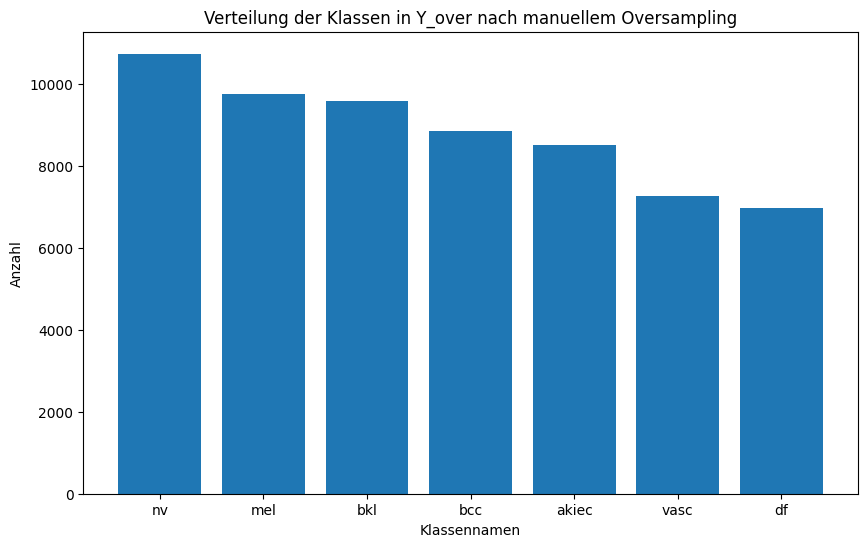

In [ ]:
def manual_oversampling_custom(X, Y, repeat_factors):
    unique_classes = np.unique(np.argmax(Y, axis=1))

    X_resampled = []
    Y_resampled = []

    for label, repeat in zip(unique_classes, repeat_factors):
        X_class = X[np.argmax(Y, axis=1) == label]
        Y_class = Y[np.argmax(Y, axis=1) == label]

        # Add repeated samples
        X_resampled.append(np.tile(X_class, (repeat, 1, 1, 1)))
        Y_resampled.append(np.tile(Y_class, (repeat, 1)))

    X_resampled = np.concatenate(X_resampled, axis=0)
    Y_resampled = np.concatenate(Y_resampled, axis=0)

    return X_resampled, Y_resampled


repeat_factors = [2, 11, 11, 21, 33, 60, 80]

X_train_over, Y_train_over = manual_oversampling_custom(X_train, Y_train, repeat_factors)

print('Shape of Data:', X_train_over.shape)
print('Shape of Y:', Y_train_over.shape)


unique, counts = np.unique(np.argmax(Y_train_over, axis=1), return_counts=True)
print('Class distribution after oversampling:', dict(zip(unique, counts)))

plt.figure(figsize=(10, 6))
plt.bar(unique, counts, tick_label=[label_dictonary[i] for i in unique])
plt.xlabel('Klassennamen')
plt.ylabel('Anzahl')
plt.title('Verteilung der Klassen in Y_over nach manuellem Oversampling')
plt.show()


In [ ]:
def augment_data(X, Y):
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    datagen.fit(X)
    return datagen

datagen_train = augment_data(X_train_over, Y_train_over)

# Split the oversampled data into training and validation sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train_over, Y_train_over, test_size=0.2, random_state=42)

train_generator = datagen_train.flow(X_train_split, Y_train_split, batch_size=32)
validation_generator = datagen_train.flow(X_val_split, Y_val_split, batch_size=32)

In [ ]:
model = create_model()

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=5, verbose=1, mode='auto')

optimizer = Adam(learning_rate=0.0055)
model.compile(optimizer=optimizer, loss=focal_loss(), metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 84, 84, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 42, 42, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 42, 42, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 21, 21, 32)        0         
 g2D)                                                            
                                                        

In [18]:
history = model.fit(X_train, Y_train,
                    batch_size=32,
                    epochs=30,
                    validation_split=0.1,
                    callbacks=[early_stop, reduce_lr])

Epoch 1/30
226/226 [==============================] - 145s 623ms/step - loss: 0.0284 - accuracy: 0.6521 - val_loss: 0.0317 - val_accuracy: 0.5873 - lr: 0.0055
Epoch 2/30
226/226 [==============================] - 156s 691ms/step - loss: 0.0249 - accuracy: 0.6671 - val_loss: 0.0244 - val_accuracy: 0.6945 - lr: 0.0055
Epoch 3/30
226/226 [==============================] - 154s 682ms/step - loss: 0.0241 - accuracy: 0.6760 - val_loss: 0.0289 - val_accuracy: 0.6920 - lr: 0.0055
Epoch 4/30
226/226 [==============================] - 142s 630ms/step - loss: 0.0234 - accuracy: 0.6879 - val_loss: 0.0530 - val_accuracy: 0.1858 - lr: 0.0055
Epoch 5/30
226/226 [==============================] - 163s 722ms/step - loss: 0.0227 - accuracy: 0.6920 - val_loss: 0.0845 - val_accuracy: 0.6920 - lr: 0.0055
Epoch 6/30
226/226 [==============================] - 170s 754ms/step - loss: 0.0228 - accuracy: 0.6897 - val_loss: 0.0226 - val_accuracy: 0.7020 - lr: 0.0055
Epoch 7/30
226/226 [==========================

In [19]:
from plotly.subplots import make_subplots

def plot_model_training_curve(history):
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Model Accuracy', 'Model Loss'])
    fig.add_trace(
        go.Scatter(
            y=history.history['accuracy'],
            name='train_acc'),
        row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_accuracy'],
            name='val_acc'),
        row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['loss'],
            name='train_loss'),
        row=1, col=2)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_loss'],
            name='val_loss'),
        row=1, col=2)
    fig.show()

In [20]:
plot_model_training_curve(history)

model_acc = model.evaluate(X_test, Y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

y_true = np.argmax(Y_test, axis=1)

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

label_dictionary = {0: 'nv', 1: 'mel', 2: 'bkl', 3: 'bcc', 4: 'akiec', 5: 'vasc', 6: 'df'}
clr = classification_report(y_true, y_pred, target_names=label_dictionary.values())
print(clr)

Test Accuracy: 73.390%
63/63 [==============================] - 10s 157ms/step
              precision    recall  f1-score   support

          nv       0.83      0.94      0.88      1338
         mel       0.57      0.15      0.23       226
         bkl       0.43      0.39      0.41       228
         bcc       0.47      0.59      0.52        93
       akiec       0.29      0.29      0.29        69
        vasc       0.46      0.57      0.51        21
          df       0.00      0.00      0.00        28

    accuracy                           0.73      2003
   macro avg       0.44      0.42      0.41      2003
weighted avg       0.70      0.73      0.70      2003



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



63/63 [==============================] - 9s 131ms/step


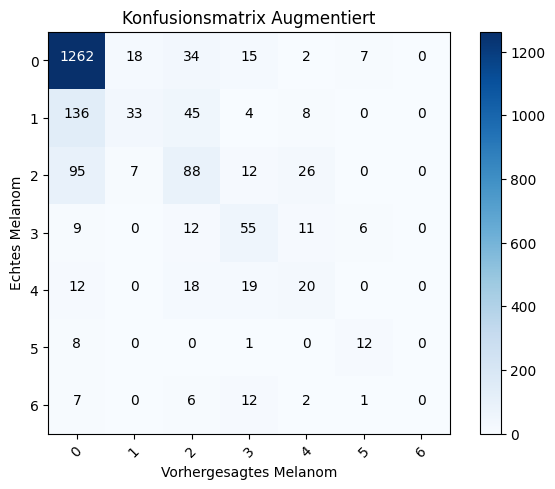

In [21]:
 def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()


# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))